## **Semi - Supervised Learning for Sentiment Analysis Approach - Movie Reviews**

**Web App:** http://34.125.92.133:8501/

# **Abstract**
The study explores the application of semi-supervised learning to sentiment analysis within the domain of Natural Language Processing (NLP), in the context of the IMDB Movie Reviews dataset.
The study seeks to understanding of semi-supervised learning's potential in NLP, and offering insights into its applicability and effectiveness in sentiment analysis tasks. We will implement different classification models to predict the sentiment analysis of IMDb reviews, either as positive or negative, using only text each review contains. By integrating semi-supervised learning techniques, it aims to demonstrate the potential, and the accuracy and efficiency in sentiment analysis tasks, by finding the model with the highest score and best generalization.  


# **Introduction & Background**


Sentiment analysis within Natural Language Processing (NLP) aims to decode sentiments in text, a crucial task for understanding public opinions on various topics, including movie reviews. The IMDB Movie Reviews dataset provides a rich source of textual data for analyzing movie-goer sentiments. However, the scarcity of labeled data presents a significant challenge for training supervised models effectively.

The study will explore on three models: Logistic Regression, Multinomial Naive Bayes, and XGBoost, each known for its distinct advantages in dealing with text data and classification tasks. Logistic Regression offers a simple yet powerful method for binary classification. Multinomial Naive Bayes is particularly suited for discrete feature models like text classification, while XGBoost is recognized for its predictive power and speed. By comparing these models under a semi-supervised learning framework, this research aims and will their performance and applicability in sentiment analysis, in the context of IMDB movie reviews. The study delves into the effectiveness of semi-supervised learning techniques in exporing sentiment classification accuracy and performance within the realm of Natural Language Processing (NLP) for movie reviews.


# **Project Objectives / Research question**

The objective of this study is to perform sentiment analysis within Natural Language Processing (NLP) for & movies review using a semi - supervised machine learning approach.
To align and achieve our objectives; we break our study into different steps - research questions necessary to guide us throughout this study - The research question following are:

*   Define/ Conduct the data segmentation analysis & visualize the factors that lead to a better understanding of our dataset.

*   What model can we use to best perform a sentiment analysis approach for the movie review.

*   What’s the evaluate appraoch to evaluate the performance of our model.

# **Brief Overview of the Approach**

The approach methodology framework that we will use in this project is call CRISP-DM, which is a cross-platform industry standard process for data mining.



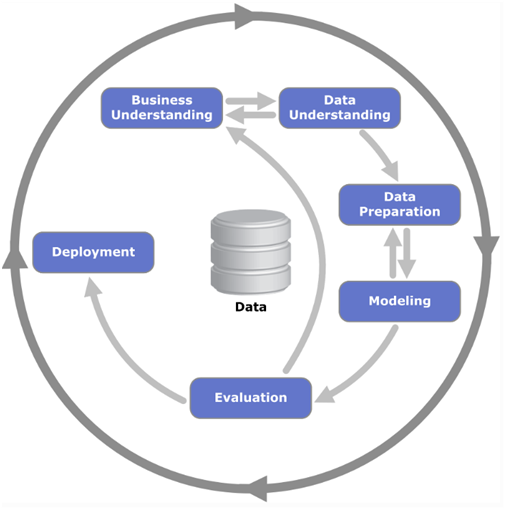

# Note - Dataset :

The project be will using static data; dataset already available rather than real-time data from different sources. The data set we are going to use in this project has been sourced from Kaggle.

## Understanding of the Movie Review Dataset

The movie review data (IMDB) comes with two tags which are positive and negative out of a total of 50,000 reviews. Positive labels are a 25,000 review count and negative ones also have a 25,000 review count. The number of words collected from the pre-processing step, that is 11557847words.

There are three columns in the movie review dataset:
* Id
* Review
* Sentiment

# Importing Libraries

This is the starting point, and the initial phase of the data analysis. We will start by Importing necessary libraries (for data cleaning/wrangling; visualization and modelling)

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import keras
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
import tokenizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
# Loading the Dataset

df = pd.read_csv("/content/IMDB_dataset.csv")

# **Data Preprocessing**

This part of Data Preprocessing, which involves transforming raw data into a proper form for a  better understandable format.

Text preprocessing is an important step in Natural Language Processing (NLP) that involves cleaning and transforming raw text data into a format suitable for analysis and machine learning models. This process is vital for enhancing the performance and accuracy of NLP tasks.

One key reason for text preprocessing is to remove noise and irrelevant information from the text, such as special characters, punctuation, and stop words. This helps in reducing the dimensionality of the data and improves the efficiency of subsequent analysis. Additionally, text normalization techniques, such as stemming and lemmatization, ensure that words are represented in their base or root form, reducing redundancy and enhancing the consistency of the dataset.

Some text preprocessing issues :

* Lowercase letters.
* Removing HTML tags.
* Removing URLs.
* Removing punctuation.
* Chat Words Treatment.
* Spelling Correction.
* Removing stop words
* Handling Emojies
* Tokenization
* Lemmatization

# Approach 1 - Data Preprocessing & Understanding the data

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.size

100000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
#check whether there are duplicated values

df.duplicated().sum()

418

In [ ]:
# drop duplicated values from the dataset

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


# Note : Approach 2 - Data Preprocessing (Tokeniation; Punctuation & STops words)
In addition to the above steps - We  should consider other series of processes in the context of the NLP approach, that aim to the clean data by eliminating repetitive, pointless, irrelevant content, and unneeded text from reviews.

The following are the different stages to carried out for our study:

* Tokenization: The dataset may also be is coupled with noises such as scripts, advertising, URLs, HTML tags, and symbols like asterisks, hashes, and other symbols that are neither useful nor relevant in classiﬁcation. To increase the eﬀectiveness of the classiﬁer, these symbols and noise must be removed, leaving only the useful words.
* The algorithms used in ML cannot diﬀerentiate between lowercase and capital letters; therefore, we will convert upper letters to lower letters.
* Punctuation makes sentences easier for humans to read, but it can be challenging for computers to tell punctuation apart from other letters. Punctuation does not improve text analysis; it is not used in IMDb text evaluations. Pre-processing the text involves eliminating punctuation to make the feature space simpler.
* Eliminates stop words because their role in classiﬁer training is not signiﬁcant. They increase the feature vector size, and eliminating them reduces the feature space’s complexity and speeds up classiﬁer training.

Other cleaning steps we should consider :
* Remoning emoji
* Quotes
* Gensim : To provide efficient, scalable, with a strong emphasis on word embeddings.

**Lowercase**

Lowercasing text in NLP preprocessing involves converting all letters in a text to lowercase. This step is essential for standardizing text data because it treats words with different cases (e.g., "Word" and "word") as the same, reducing vocabulary size and improving model efficiency. It ensures consistency in word representations, making it easier for algorithms to recognize patterns and associations.

In [ ]:
# Approach to to convert a single row into lowercase

df['review'][2].lower()

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [ ]:
# Approach to covert the whole column into lower case

df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


**Removing HTML tags**

Removing HTML tags is an essential step in NLP text preprocessing to ensure that only meaningful textual content is analyzed. HTML tags contain formatting information and metadata irrelevant to linguistic analysis. Including these tags can introduce noise and distort the analysis results.

In [ ]:
# Approach to - Function for removing Html Tags

# Function for removing Html Tags

import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'' ,text)

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [ ]:
#check a sample
df['review'][5:10]

5    probably my all-time favorite movie, a story o...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing, fresh & innovative i...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

**Remove stop words**

In NLP text preprocessing, removing stop words is crucial to enhance the quality and efficiency of analysis. Stop words are common words like "the," "is," and "and," which appear frequently in text but carry little semantic meaning. By eliminating stop words, we reduce noise in the data, decrease the dimensionality of the dataset, and improve the accuracy of NLP tasks such as sentiment analysis, topic modeling, and text classification.



In [ ]:
# NLTK Used
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_words = set(stopwords.words('english'))  # Assuming we're working with English

In [ ]:
print(stop_words)

{"don't", 'themselves', "shan't", 'so', 'wouldn', 're', "won't", 'will', 'whom', 'and', 'be', 'once', 'himself', 'it', 'was', 'been', 'hasn', 'doesn', 'hadn', 'the', 'out', 'only', 'in', 'because', 'isn', "you'd", 'about', 'yourselves', 'her', 'don', 'we', 'until', 'into', 'before', 'are', 'their', 'which', 'a', 'from', 'did', 'for', "doesn't", "weren't", 't', 'she', 'all', 'aren', 'wasn', 'having', "should've", 'to', 'they', 'above', 'hers', 'that', "aren't", 'again', 'why', "shouldn't", 'his', 'mustn', 'shouldn', 'has', "hasn't", 'with', 'ain', "couldn't", 'when', 'what', 'theirs', 'at', 'itself', "she's", 'there', 'didn', "hadn't", 'such', 'does', 'yourself', 'both', "mustn't", 'this', 'as', 'herself', 'of', "that'll", 'haven', 'yours', 'being', 'down', 'needn', 'should', 'me', 'where', 've', 'these', 'off', 'very', 'i', 'mightn', 'ourselves', 'its', 'just', "needn't", 'our', "wouldn't", 'then', "isn't", 'am', 'not', 'further', 'shan', 'up', 'by', 'my', 'who', 'myself', 'but', 'coul

In [ ]:
def rem_stopwords(text):
    clean = []
    for word in text.split():
        if word.lower() not in stop_words:
            clean.append(word)
    return " ".join(clean)

In [ ]:
# Let's apply the function to your dataframe

df["review"]=df["review"].apply(rem_stopwords)

**Approach - Removes double quotes from the text dataset**





In [ ]:
df["review"]=df["review"].apply(lambda x : x.replace('"',""))


**Approach to preprocess the text data in a standardized manner before further analysis or modeling tasks**





In [ ]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
def gensim_preprocess(text):
    cleaned = simple_preprocess(text)
    return cleaned

In [ ]:
df["review"] = df["review"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [ ]:
df["review"] = df["review"].apply(gensim_preprocess)

In [ ]:
df["review"].sample(3)

2840     [star, rating, saturday, night, friday, night,...
40098    [took, back, childhood, corny, fab, one, ever,...
45742    [came, dark, blue, world, feeling, sigh, so, s...
Name: review, dtype: object

In [ ]:
df['review'][5]

['probably',
 'all',
 'time',
 'favorite',
 'movie',
 'story',
 'selflessness',
 'sacrifice',
 'dedication',
 'noble',
 'cause',
 'preachy',
 'boring',
 'never',
 'gets',
 'old',
 'despite',
 'seen',
 'times',
 'last',
 'years',
 'paul',
 'lukas',
 'performance',
 'brings',
 'tears',
 'eyes',
 'bette',
 'davis',
 'one',
 'truly',
 'sympathetic',
 'roles',
 'delight',
 'kids',
 'are',
 'grandma',
 'says',
 'like',
 'dressed',
 'up',
 'midgets',
 'children',
 'makes',
 'fun',
 'watch',
 'mother',
 'slow',
 'awakening',
 'what',
 'happening',
 'world',
 'roof',
 'believable',
 'startling',
 'dozen',
 'thumbs',
 'they',
 'up',
 'movie']

**Remove Punctuations**

Removing punctuation marks is essential in NLP text preprocessing to enhance the accuracy and efficiency of analysis. Punctuation marks like commas, periods, and quotation marks carry little semantic meaning and can introduce noise into the dataset. By removing them, the text becomes cleaner and more uniform, making it easier for machine learning models to extract meaningful features and patterns.

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    exclude = set(string.punctuation)  # Assuming you've imported string.punctuation
    if isinstance(text, str):
        for char in exclude:
            text = text.replace(char, '')
    return text

In [ ]:
df['review'][5]

['probably',
 'all',
 'time',
 'favorite',
 'movie',
 'story',
 'selflessness',
 'sacrifice',
 'dedication',
 'noble',
 'cause',
 'preachy',
 'boring',
 'never',
 'gets',
 'old',
 'despite',
 'seen',
 'times',
 'last',
 'years',
 'paul',
 'lukas',
 'performance',
 'brings',
 'tears',
 'eyes',
 'bette',
 'davis',
 'one',
 'truly',
 'sympathetic',
 'roles',
 'delight',
 'kids',
 'are',
 'grandma',
 'says',
 'like',
 'dressed',
 'up',
 'midgets',
 'children',
 'makes',
 'fun',
 'watch',
 'mother',
 'slow',
 'awakening',
 'what',
 'happening',
 'world',
 'roof',
 'believable',
 'startling',
 'dozen',
 'thumbs',
 'they',
 'up',
 'movie']

In [ ]:
remove_punc(df['review'][5])

['probably',
 'all',
 'time',
 'favorite',
 'movie',
 'story',
 'selflessness',
 'sacrifice',
 'dedication',
 'noble',
 'cause',
 'preachy',
 'boring',
 'never',
 'gets',
 'old',
 'despite',
 'seen',
 'times',
 'last',
 'years',
 'paul',
 'lukas',
 'performance',
 'brings',
 'tears',
 'eyes',
 'bette',
 'davis',
 'one',
 'truly',
 'sympathetic',
 'roles',
 'delight',
 'kids',
 'are',
 'grandma',
 'says',
 'like',
 'dressed',
 'up',
 'midgets',
 'children',
 'makes',
 'fun',
 'watch',
 'mother',
 'slow',
 'awakening',
 'what',
 'happening',
 'world',
 'roof',
 'believable',
 'startling',
 'dozen',
 'thumbs',
 'they',
 'up',
 'movie']

**Remove emoji**

Handling emojis in NLP text preprocessing is essential for several reasons. Emojis convey valuable information about sentiment, emotion, and context in text data, especially in informal communication channels like social media. However, they pose challenges for NLP algorithms due to their non-textual nature. Preprocessing involves converting emojis into meaningful representations, such as replacing them with textual descriptions or mapping them to specific sentiment categories.

In [ ]:
import re

def remove_emoji(text):
    # Check if the input is a string
    if not isinstance(text, (str, bytes)):
        # If not, return text as it is or convert it to a string as needed
        return text
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df['review'][5] = remove_emoji(df['review'][5])

In [ ]:
df_emoji = remove_emoji(df['review'][5])

In [ ]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


# Note - Data Preprocessing and Cleaning

At this stage we have analysed the dataset.
We have completed the cleaning step and gained significant insights about the dataset, statistical analysis to prepare the dataset for EDA and successive steps.

# **Exploratory Data Analysis (EDA)**

This section is useful for understanding of data structure,  hidden patterns, its relationships, as well as gaining insights valuable knowledge through data visualization.
This steps is important for feature analysis and identifying and understand the distribution of words, the balance of classes (positive/negative), and any patterns in the data.


**Count Plot - Categorizing Sentiments**

The sentiment values are categorized into two groups labeled as 'positive' and 'negative' in the plot.

<ipython-input-100-78f32d02bd64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette = ['green','red'])


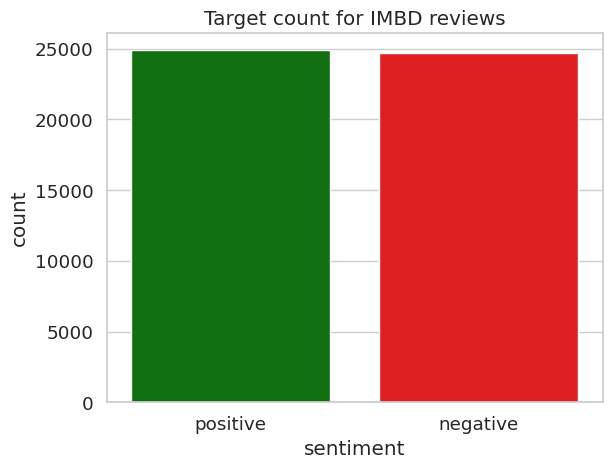

In [ ]:
# Count Plot
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(x=df['sentiment'], palette = ['green','red'])
plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
plt.title('Target count for IMBD reviews')
plt.show()

In [ ]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 24884 i.e. 50.19 % of the dataset
Negative reviews are 24698 i.e. 49.81 % of the dataset


**Plotting - Word Clouds: Visual Representation of text data**

This section will create a word cloud for positive and negative reviews. It offers a blend of visual exploration, that serves as a visual representation of the most frequent words in positive sentiments. By visualizing these words through a word cloud, it helps to quickly grasp the prominent themes and sentiments expressed in the positive and negative reviews. This approach aids in identifying key aspects that resonate positively and negatively with viewers, offering valuable insights into the prevailing sentiments and preferences within the dataset.

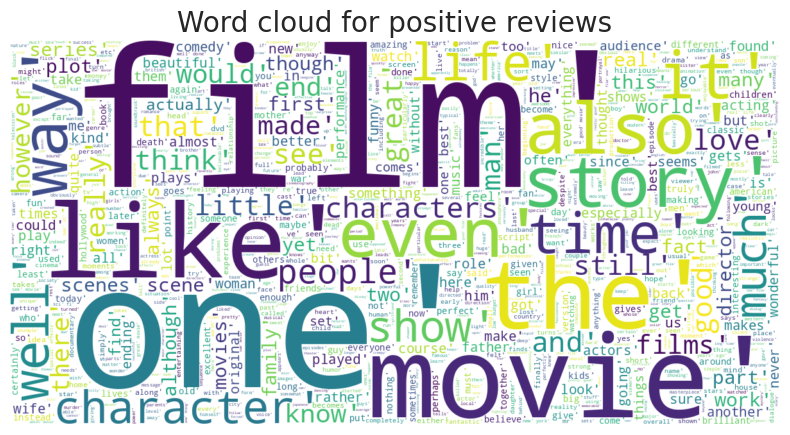

In [ ]:
# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']

# Combine all positive reviews into one large text string
# positive_text = " ".join(review for review in positive_reviews)
positive_text = " ".join(str(review) for review in positive_reviews)

# Generate a word cloud image
wordcloud = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_text)

# Display the generated image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

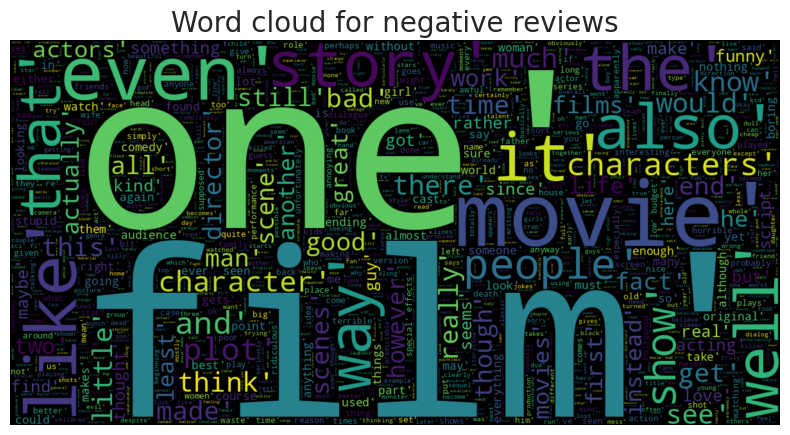

In [ ]:
# Filter the dataset for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['review']

# Combine all negative reviews into a single string
# Ensure each review is treated as a string
negative_text = " ".join(str(review) for review in negative_reviews)

# Generate a word cloud image for negative reviews
wordcloud_negative = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(negative_text)

# Display the generated image for negative reviews:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

**Plot – Number of Characters in Texts**

The plot helps to of visualizing the distribution of word counts in the reviews. This plot helps in understanding the length and complexity of the reviews, providing insights into the structure and content of the text data.

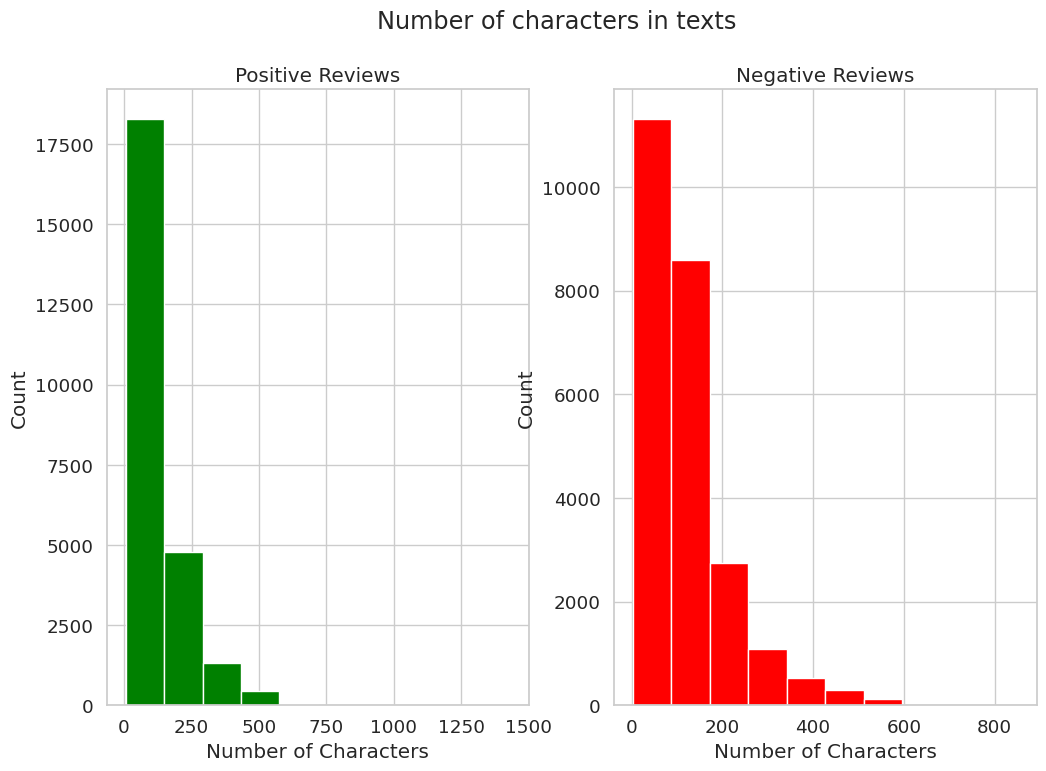

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_reviews.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')

text_len=negative_reviews.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

**Plot – Number of Words in Texts**

The plot helps to of visualizing the distribution of word counts in the reviews. This plot helps in understanding the length and complexity of the reviews, providing insights into the structure and content of the text data.

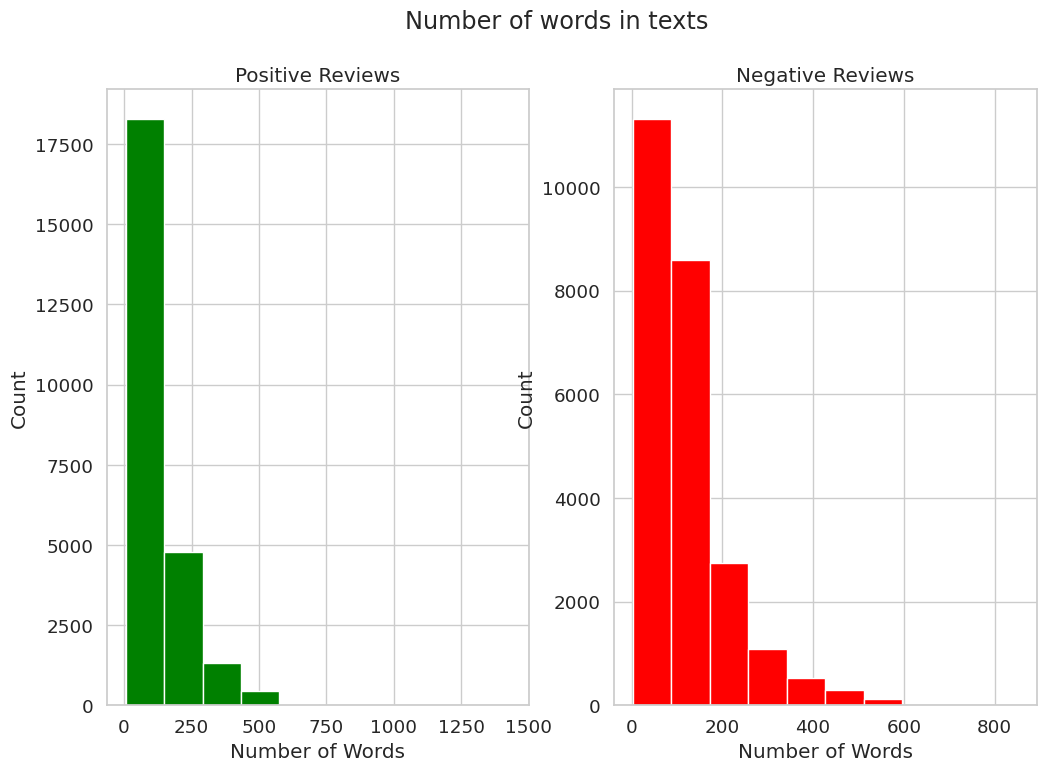

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

# text_len = positive_reviews.str.split().map(lambda x: len(x))
text_len = positive_reviews.dropna().astype(str).map(lambda x: len(x.split()))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')

text_len = negative_reviews.dropna().astype(str).map(lambda x: len(x.split()))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

**Distribution of number of words per reviews**

The plot helps to of visualizing the distribution of word counts in the reviews. This plot helps in understanding the length and complexity of the reviews, providing insights into the structure and content of the text data.



<ipython-input-54-411e214cc0cb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word, ax=ax1,color='green')
<ipython-input-54-411e214cc0cb>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,ax=ax2,color='red')


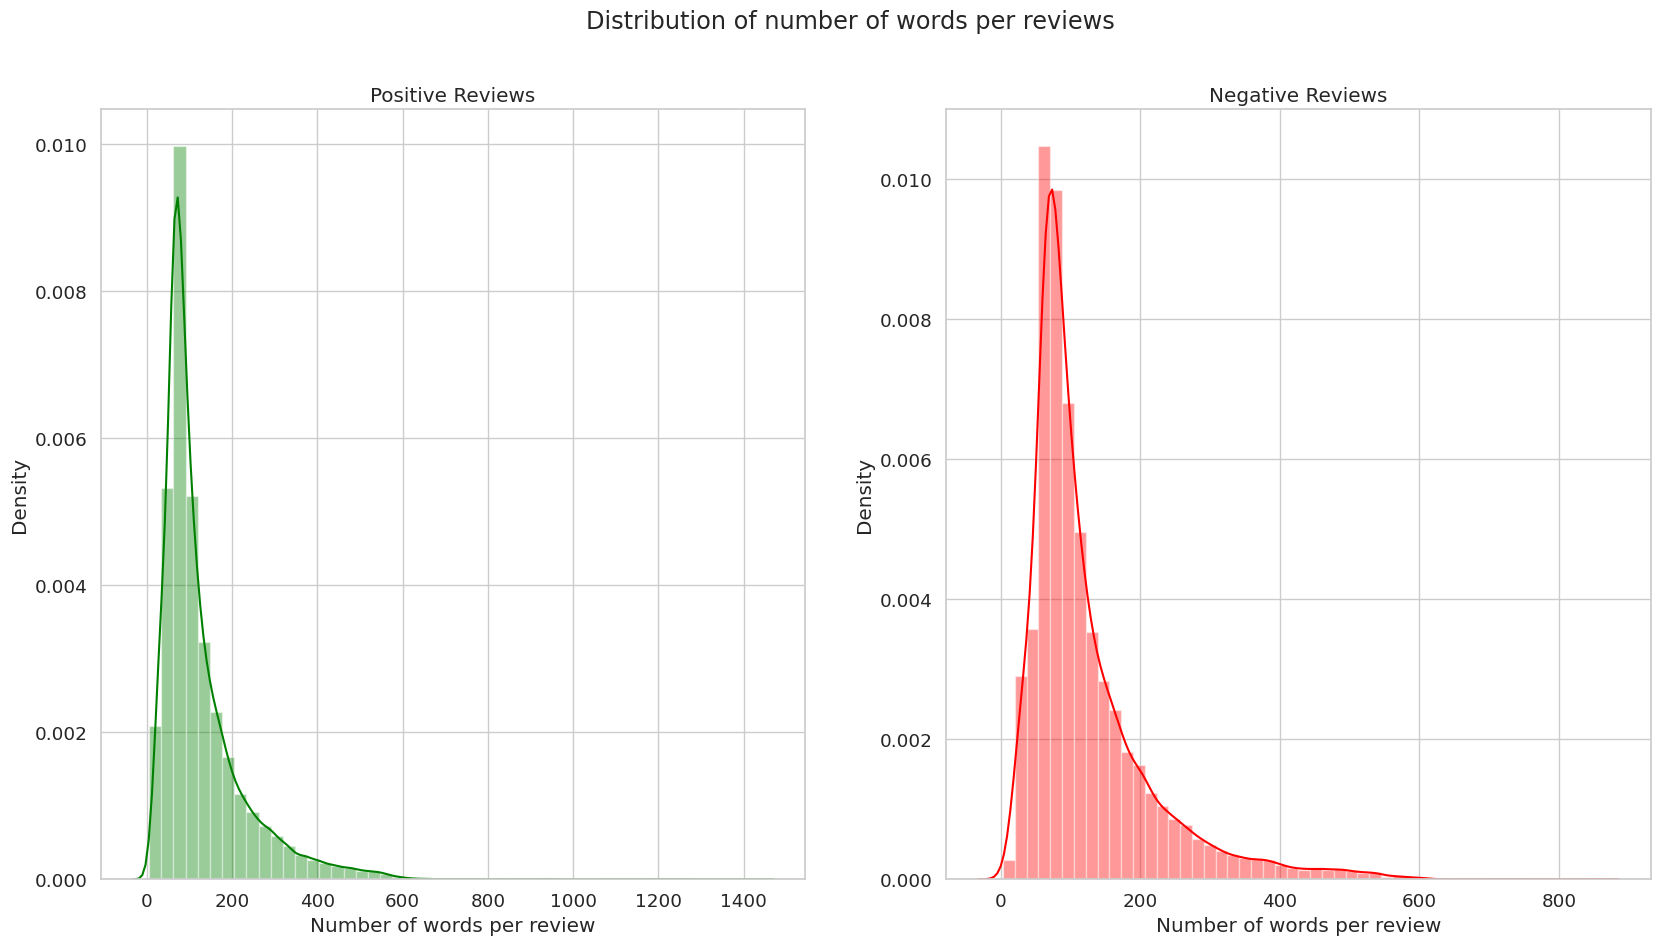

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
# word = positive_reviews.str.split().apply(lambda x : len(x) )
word = positive_reviews.dropna().astype(str).apply(lambda x :len(x.split()))
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_reviews.dropna().astype(str).apply(lambda x :len(x.split()))
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

**Plot - most common words in the dataset**

Most common words in the data" plot helps to visually illustrating the frequency of words across the dataset. It also identify the most commonly occurring words, that provide insights into the prevalent themes and topics within the reviews. The visualization helps in understanding the key terms that are frequently used in both positive and negative sentiments.

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        # Check if the item is a list and join it into a single string, or ensure it's treated as a string
        review_text = ' '.join(i) if isinstance(i, list) else str(i)
        for j in review_text.split():
            words.append(j.strip())
    return words

corpus = get_corpus(df.review)
print(corpus[:5])

['one', 'reviewers', 'mentioned', 'watching', 'oz']


In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
# Edit & Comment / Change name
most_common

,corpus,countv
0,movie,87241
1,film,79118
2,one,53187
3,like,39831
4,good,29531
5,it,29335
6,the,27049
7,time,24895
8,even,24653
9,would,24398


In [ ]:
most_common = most_common.sort_values('countv')

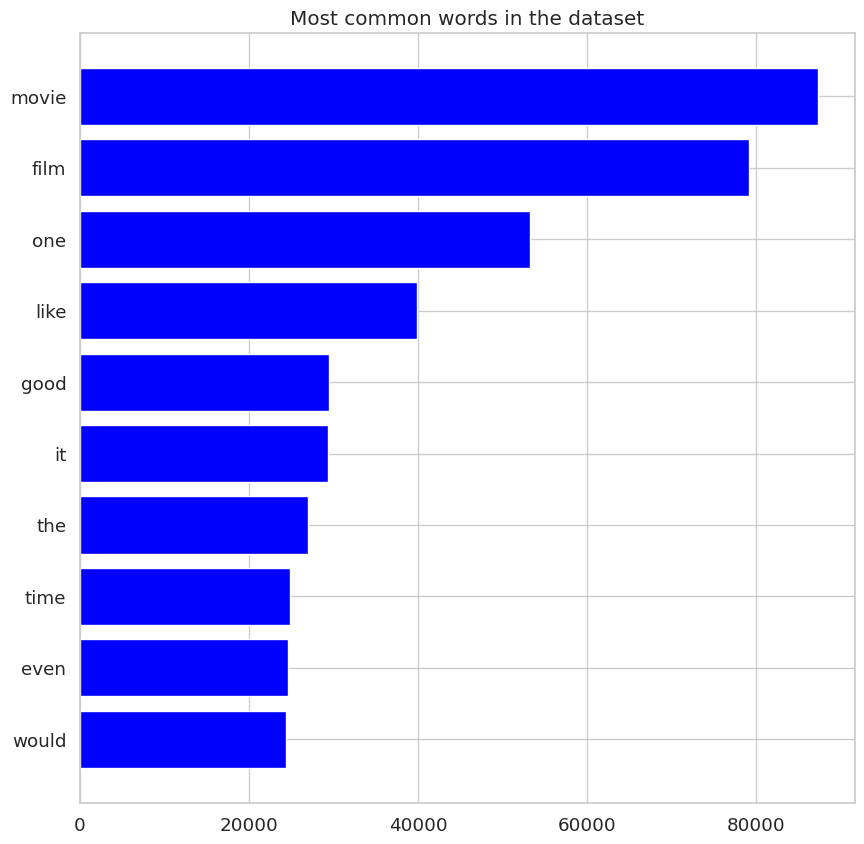

In [ ]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

# **Modelling**



Predicting whether the sentiment in a review is positive or negative is a Natural Language Processing challenge that can be solved with either a binary classification or deep learning algorithm.

For our study , I will explore using Multinomial Logistic Regression, Multinomial Naive Bayes, XGBoost as the base model, and a Long Short Term Memory (LSTM) based tensorflow model as the comparison model.






**Converting target variable to numeric labels**


In [ ]:
# converting target variable to numeric labels
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]

In [ ]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, there, family, little, boy, jake, ...",0
4,"[petter, mattei, love, time, money, visually, ...",1


**Splitting into Train and Test**

First, we split the dataset into training, and test sets, stratifying along the target variable.



In [ ]:
# Splitting into train and test

train, test= train_test_split(df, test_size=0.2, random_state=42)
Xtrain, ytrain = train['review'], train['sentiment']
Xtest, ytest = test['review'], test['sentiment']

**TF-IDF Vectorization**

Concept of using the preprocessed (clean) text data for TF-IDF vectorization, a technique for transforming text into a numerical representation that captures the importance of words within documents relative to a collection.


In [ ]:
# Raw Text for TF-IDF Vectorization

Xtrain_str = [" ".join(doc) for doc in Xtrain]
Xtest_str = [" ".join(doc) for doc in Xtest]

tfidf_vect = TfidfVectorizer() # Initialize the TfidfVectorizer
Xtrain_tfidf = tfidf_vect.fit_transform(Xtrain_str)
Xtest_tfidf = tfidf_vect.transform(Xtest_str)

**Approach - Model Methodology**


Below approach is the Modelling Methodology for IMDB Dataset Movie Reviews using Semi-Supervised Learning:


* Model Selection - Evaluate Logistic Regression, Multinomial Naive Bayes, and XGBoost models for sentiment analysis.

* Model Training and Evaluation :
     - Split the dataset into training and testing sets.
     - Train the models on the labeled data and iteratively incorporate unlabeled data for improved performance.
     - Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
*	Interpretation and Visualization :
     - Analyze feature importance to understand which words contribute most to sentiment prediction.
     - Visualize results using confusion matrices, and ROC curves

**Logistic Regression Model**

The Logistic regression is a statistical model employed in regression analysis to predict the likelihood of a binary result based on one or more predictor variables. It expresses the log-odds of an occurrence as a linear mix of the predictor variables. Within logistic regression, the target variable is binary, having two potential outcomes, often represented as "0" and "1".

-


The output reports an accuracy score of (89.58%), demonstrating the model's effectiveness in classifying sentiment based on movie reviews.

In [ ]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(Xtrain_tfidf, ytrain)

# Predict the sentiment labels for the test set
y_pred_test = lr.predict(Xtest_tfidf)

# Calculate and print the accuracy of the model on the test set
lr_accuracy = accuracy_score(ytest, y_pred_test)
print(f"Test Accuracy: {lr_accuracy * 100:.2f}%")

Test Accuracy: 89.58%


The Logistic Regression model shows a commendably balanced performance with an accuracy of approximately 89.58% and similar precision, recall, and F1 scores across both sentiment classes. This indicates that the model is well-tuned and balanced, not overly favoring either class.

In [ ]:
# Generate a classification report

report = classification_report(ytest, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4939
           1       0.88      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



**Confusion Matrix**

It contains information about actual and predicted classifications done by a classification system. The Confusion Matrix has four categories: True positives (TP) refer to correctly labeled as positives; False positives (FP) refer to negative and incorrectly labeled as positive; True negatives (TN) correspond to negatives and correctly labeled as negative; False negatives (FN) refer to positive and incorrectly labeled as negative.

Analysis:
* High TP and TN rates indicate that the model is accurately identifying both positive and negative sentiments.
* High FP rates suggest that the model often incorrectly predicts negative reviews as positive.
* High FN rates indicate that the model frequently misses positive reviews,
  marking them as negative.

The balance between sensitivity (ability to detect positives) and specificity (ability to detect negatives) can be observed in the figure below.

From the confusion matrix plot of the  model show the result in True Negative (TN) 4337, True Positive (TP) 4547, False Negative (FN) 602, False Positive (FP) 431; which means the model is good enough in sentiments analysis.


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score

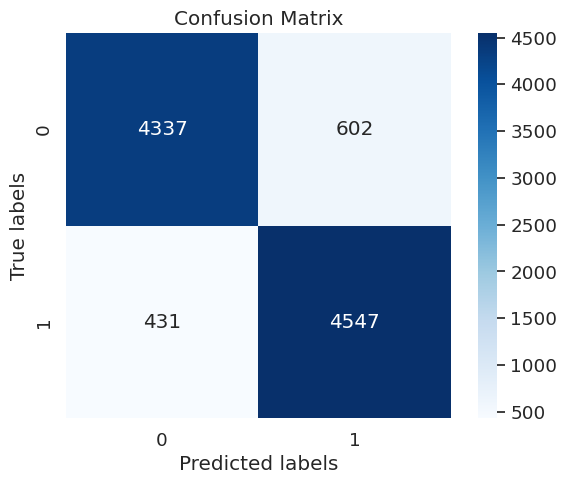

In [ ]:
# Calculate and plot confusion matrix

conf_matrix = confusion_matrix(ytest, y_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Receiver Operating Characteristic (ROC)**

The ROC provides a comprehensive measure of the model’s performance across various classification thresholds.

In [ ]:
# Predict probabilities for ROC curve
y_score = lr.predict_proba(Xtest_tfidf)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)


The (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

* A curve closer to the top-left corner indicates a better performance, meaning a high true positive rate and a low false positive rate.
* AUC close to 1 suggests excellent model performance, while an AUC about 0.5 indicates no better than random guessing.
* The ROC curve help in selecting an optimal threshold for classification based on the balance between TPR and FPR that suits the specific application's needs.


ROC curve shows 0.96, The Logistic Regression model has the highest AUC, suggesting it has the best discriminatory ability among the three models.

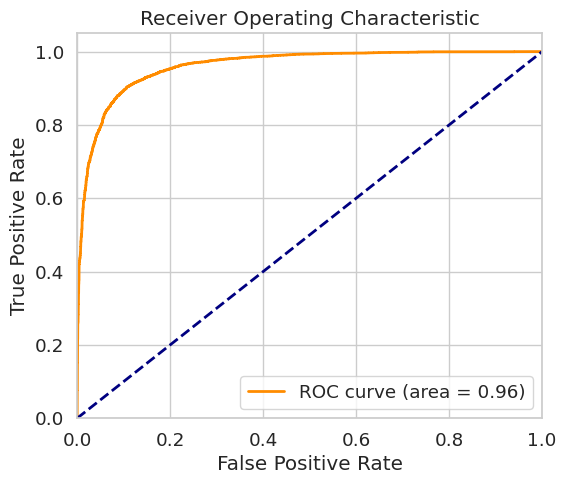

In [ ]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Print accuracy
accuracy = accuracy_score(ytest, y_pred_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.58%


**Multinomial Naive Bayes**

This is a probabilistic machine learning algorithm that is widely used for text classification tasks, especially in Natural Language Processing (NLP).


-


The output reports an accuracy score of (86.69%), demonstrating the model's effectiveness in classifying sentiment based on movie reviews.

In [ ]:
# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Train the model on the training data
mnb.fit(Xtrain_tfidf,ytrain)

# Predict the sentiment labels for the test set
mnb_pred_test = mnb.predict(Xtest_tfidf)

# Calculate and print the accuracy of the model on the test set
mnb_acc = accuracy_score(ytest,mnb_pred_test)

print(f"Test Accuracy: {mnb_acc * 100:.2f}%")

Test Accuracy: 86.69%


The Naive Bayes model shows a commendably balanced performance with an accuracy of approximately 86.69% and similar precision, recall, and F1 scores across both sentiment classes. This indicates that the model is well-tuned and balanced, not overly favoring either class.



In [ ]:
# Generate a classification report
report = classification_report(ytest, mnb_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4939
           1       0.87      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



**Confusion Matrix**

This matrix provides a visual summary of how well the model predicted versus the actual classifications.
The main diagonal (top-left to bottom-right) shows correct predictions, while off-diagonal values indicate misclassifications. High values in the off-diagonal cells suggest areas where the model struggles.

From the confusion matrix plot of the model show the result in True Negative (TN) 4329, True Positive (TP) 4268, False Negative (FN) 610, False Positive (FP) 710; which means the model is good enough in Sentiments analysis.

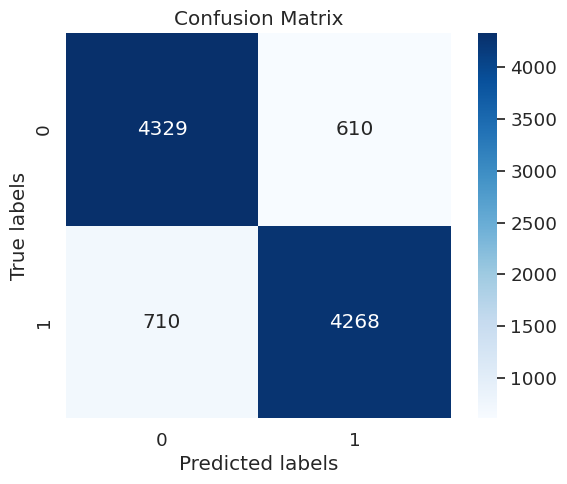

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(ytest, mnb_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Receiver Operating Characteristic (ROC)**

The ROC provides a comprehensive measure of the model’s performance across various classification thresholds.

In [ ]:
# Predict probabilities for ROC curve
ynm_score = mnb.predict_proba(Xtest_tfidf)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(ytest, ynm_score)
roc_auc = auc(fpr, tpr)

The (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

* A curve closer to the top-left corner indicates a better performance, meaning a high true positive rate and a low false positive rate.
* AUC close to 1 suggests excellent model performance, while an AUC about 0.5 indicates no better than random guessing.
* The ROC curve help in selecting an optimal threshold for classification based on the balance between TPR and FPR that suits the specific application's needs.


ROC curve shows 0.94, the Naive Bayes model has the second good AUC.

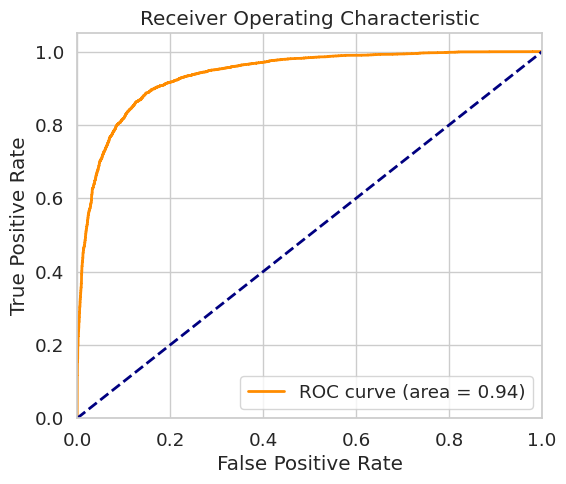

In [ ]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

XGBoost - Extreme Gradient Boosting. It is an efficient and scalable implementation of gradient boosting, a machine learning technique used for regression and classification problems.


-


The output reports an accuracy score of (89.58%), demonstrating the model's effectiveness in classifying sentiment based on movie reviews.

In [ ]:
# Initialize XG Boost
XGB = XGBClassifier()

# Train the model on the training data
XGB.fit(Xtrain_tfidf, ytrain)

# Predict the sentiment labels for the test set
yx_pred_test = XGB.predict(Xtest_tfidf)

# Calculate and print the accuracy of the model on the test set
accuracy_XBG = accuracy_score(ytest, yx_pred_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 89.58%


The XGBoost model shows a commendably balanced performance with an accuracy of approximately 89.58% with a higher values comapre to the precision, recall, and F1 scores across both sentiment classes.


In [ ]:
# Generate a classification report
report = classification_report(ytest, yx_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4939
           1       0.83      0.87      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



**Confusion Matrix**

This matrix provides a visual summary of how well the model predicted versus the actual classifications.
The main diagonal (top-left to bottom-right) shows correct predictions, while off-diagonal values indicate misclassifications. High values in the off-diagonal cells suggest areas where the model struggles.

From the confusion matrix plot of the model show the result in True Negative (TN) 4059, True Positive (TP) 4343, False Negative (FN) 880, False Positive (FP) 635; which means the model is good enough in Sentiments analysis.

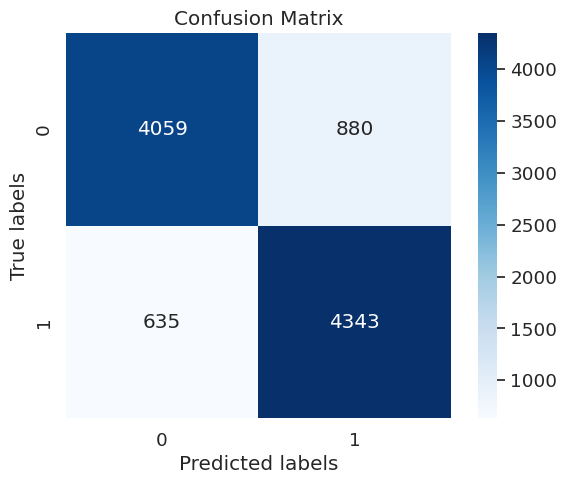

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(ytest, yx_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Receiver Operating Characteristic (ROC)**

The ROC provides a comprehensive measure of the model’s performance across various classification thresholds.

In [ ]:
# Predict probabilities for ROC curve
yX_score = XGB.predict_proba(Xtest_tfidf)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(ytest, yX_score)
roc_auc = auc(fpr, tpr)

The (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

A curve closer to the top-left corner indicates a better performance, meaning a high true positive rate and a low false positive rate.
AUC close to 1 suggests excellent model performance, while an AUC about 0.5 indicates no better than random guessing.
The ROC curve help in selecting an optimal threshold for classification based on the balance between TPR and FPR that suits the specific application's needs.




Naive Bayes - ROC curve model's AUC is the lowest, although it is still above 0.90, which is considered still good.

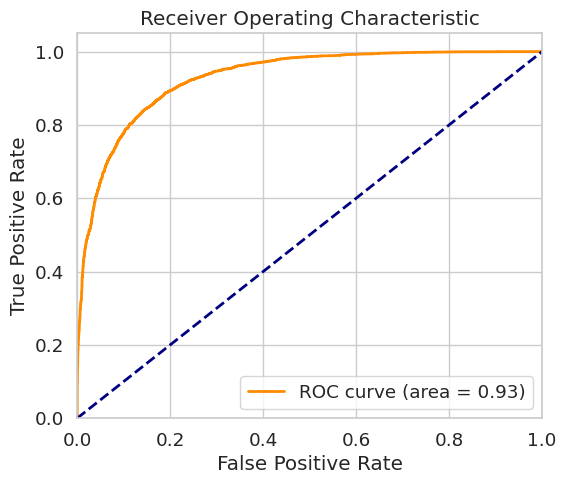

In [ ]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion

The study established a model to do sentiment analysis on movie reviews using machine learning techniques in order to assist people in selecting movies based on the attractiveness and interest of the reviews. We explore three models Logistic Regression, Multinomial Naive Bayes, and XGBoost.
The study approach methods had identify texts from the review dataset according to the users opinions toward movies, which are both negative and positive. The extracted data were further enhanced using feature classification techniques and these methopologies facilitate the keywords from the users reviews. After training and testing the dataset were conduced, Logistic Regression has the best result compared to the other models.
________________________________________________________________________________

**Bonnus -**
**LSTM**

**Neural Network Models**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
# Splitting into train and test (Train, Test & Valid

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'],test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [ ]:
#  The Tokenizer class simplifies text preprocessing by handling tokenization and conversion to numerical sequences efficiently.

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df.review)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_valid1 = tokenizer.texts_to_sequences(X_valid)
X_test1 = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [ ]:
print(X_train[2])

['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'light', 'hearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'characters', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'love', 'this', 'laughed', 'one', 'woody', 'comedies', 'years', 'dare', 'say', 'decade', 've', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'woman', 'this', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friends']


In [ ]:
print(X_train1[2])

[114, 1, 1170, 99, 489, 260, 70, 212, 29, 207, 48, 677, 748, 345, 244, 8, 49, 568, 77, 17, 1871, 2601, 156, 7, 55, 275, 603, 10, 149, 760, 3901, 532, 27, 9, 2550, 1396, 21, 8, 9, 244, 334, 139, 8, 4755, 427, 595, 898, 227, 857, 550, 179, 2031, 857, 717, 71, 29, 1, 7, 261, 1096, 287, 77, 162, 527, 51, 2224, 2822, 325, 179, 279, 1, 15, 48, 7, 51, 1028, 936, 7, 10, 1675, 432, 275, 21, 325, 113, 3988, 898, 3, 301, 1858, 227, 3757, 10, 1066, 15, 8, 3870, 17, 227, 15, 3697, 77, 92, 166, 2073, 545, 211, 3814, 904, 58, 3498, 1133, 793, 290, 360, 1141, 51, 558, 288, 102, 5, 147, 243, 1027, 733, 6, 93, 28, 109, 48, 196, 4, 265, 1, 273, 109, 55, 1250, 486, 1306, 37, 43, 1061, 133, 127, 1, 2080, 1, 439, 1230, 6, 707, 1061, 7, 5, 60, 41, 1765, 46, 103, 3287]


In [ ]:
seq_lens = [len(s) for s in X_train1]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 103.1
max length: 909


In [ ]:
# Approach aim to ensures that all input sequences fed into a neural network model have consistent dimensions, which is necessary for efficient batch processing and model training
maxlen = 150

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_valid1 = pad_sequences(X_valid1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

print(X_train1[2, :])

[ 677  748  345  244    8   49  568   77   17 1871 2601  156    7   55
  275  603   10  149  760 3901  532   27    9 2550 1396   21    8    9
  244  334  139    8 4755  427  595  898  227  857  550  179 2031  857
  717   71   29    1    7  261 1096  287   77  162  527   51 2224 2822
  325  179  279    1   15   48    7   51 1028  936    7   10 1675  432
  275   21  325  113 3988  898    3  301 1858  227 3757   10 1066   15
    8 3870   17  227   15 3697   77   92  166 2073  545  211 3814  904
   58 3498 1133  793  290  360 1141   51  558  288  102    5  147  243
 1027  733    6   93   28  109   48  196    4  265    1  273  109   55
 1250  486 1306   37   43 1061  133  127    1 2080    1  439 1230    6
  707 1061    7    5   60   41 1765   46  103 3287]


In [ ]:
# Construction of simple neural network model for text classification tasks using word embeddings, dense layers.

embedding_dim = 50
callback = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           5076350   
                                                                 
 flatten (Flatten)           (None, 7500)              0         
                                                                 
 dense (Dense)               (None, 10)                75010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5151371 (19.65 MB)
Trainable params: 5151371 (19.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# The history approach object will store information about the training process, such as loss and accuracy values for each epoch, which can be used for visualization and further analysis.

history = model.fit(X_train1, y_train,epochs=10,verbose=True,validation_data=(X_valid1, y_valid),batch_size=1000,callbacks=[callback])

Epoch 1/10
36/36 [==============================] - 8s 180ms/step - loss: 0.6909 - accuracy: 0.5309 - val_loss: 0.6786 - val_accuracy: 0.5473
Epoch 2/10
36/36 [==============================] - 4s 115ms/step - loss: 0.5243 - accuracy: 0.7509 - val_loss: 0.3511 - val_accuracy: 0.8561
Epoch 3/10
36/36 [==============================] - 5s 130ms/step - loss: 0.2695 - accuracy: 0.8919 - val_loss: 0.2956 - val_accuracy: 0.8770
Epoch 4/10
36/36 [==============================] - 5s 128ms/step - loss: 0.2058 - accuracy: 0.9210 - val_loss: 0.2942 - val_accuracy: 0.8762
Epoch 5/10
36/36 [==============================] - 4s 110ms/step - loss: 0.1652 - accuracy: 0.9422 - val_loss: 0.3027 - val_accuracy: 0.8737
Epoch 6/10
36/36 [==============================] - 5s 127ms/step - loss: 0.1263 - accuracy: 0.9625 - val_loss: 0.3151 - val_accuracy: 0.8692


In [ ]:
# Assuming y_test is your true labels and X_test1 is your input data
predictions = model.predict(X_test1)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy)

310/310 [==============================] - 1s 3ms/step
Accuracy: 0.8770797620248059


In [ ]:
history.history

{'loss': [0.6908642649650574,
  0.5243270993232727,
  0.2695440948009491,
  0.2057846486568451,
  0.16522154211997986,
  0.1262807995080948],
 'accuracy': [0.5308700799942017,
  0.7508543729782104,
  0.8919267058372498,
  0.9210039973258972,
  0.9422096610069275,
  0.9625469446182251],
 'val_loss': [0.6786370873451233,
  0.35106533765792847,
  0.29562869668006897,
  0.2941752076148987,
  0.30271032452583313,
  0.31514814496040344],
 'val_accuracy': [0.5472649335861206,
  0.8560625314712524,
  0.8769851326942444,
  0.8762288689613342,
  0.8737080693244934,
  0.8691706657409668]}

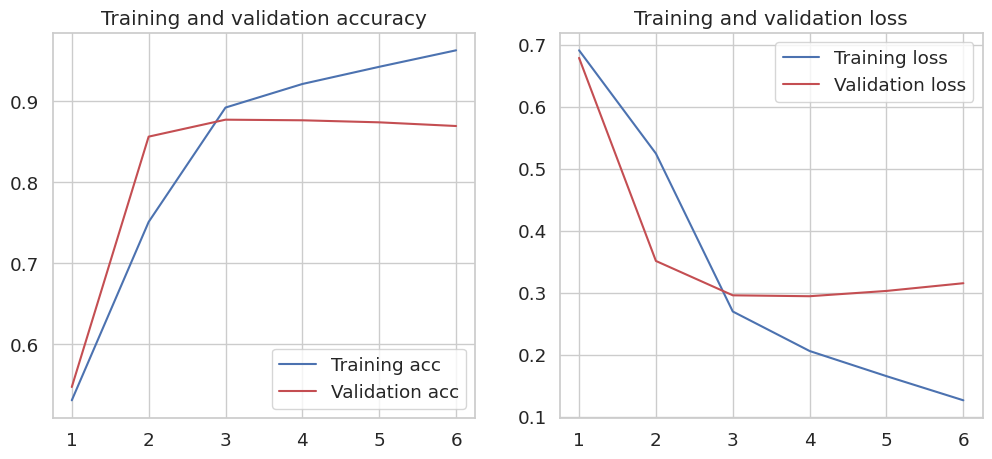

In [ ]:
plot_history(history)

**LSTM Model**


In [ ]:
# Approach to construct a LSTM (Long Short-Term Memory) layer for sequential data processing. The model is compiled with appropriate settings for training and evaluation

embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

# Instantiate and build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           5076350   
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5136851 (19.60 MB)
Trainable params: 5136851 (19.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Approach - To optimizes the model parameters and evaluates its performance on both training and validation datasets.

model.fit(X_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(X_valid1,y_valid),callbacks=[callback])

Epoch 1/10
140/140 [==============================] - 203s 1s/step - loss: 0.6605 - accuracy: 0.5773 - val_loss: 0.5991 - val_accuracy: 0.7383
Epoch 2/10
140/140 [==============================] - 189s 1s/step - loss: 0.6345 - accuracy: 0.6459 - val_loss: 0.6290 - val_accuracy: 0.6466
Epoch 3/10
140/140 [==============================] - 179s 1s/step - loss: 0.6242 - accuracy: 0.6687 - val_loss: 0.6528 - val_accuracy: 0.5173


In [ ]:
# Use predict to get the probabilities
probabilities = model.predict(X_test1)

# Convert probabilities to class labels using 0.5 as a threshold
predicted_classes = (probabilities > 0.5).astype("int32")

# Now, use predicted_classes for accuracy calculation
accuracy = accuracy_score(y_test, predicted_classes.flatten())
print(f"Accuracy: {accuracy*100:.2f}%")

310/310 [==============================] - 14s 44ms/step
Accuracy: 87.46%


In [ ]:
history.history

In [ ]:
# Generate a classification report

report_LSTM = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(report_LSTM)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4909
           1       0.87      0.88      0.88      5008

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



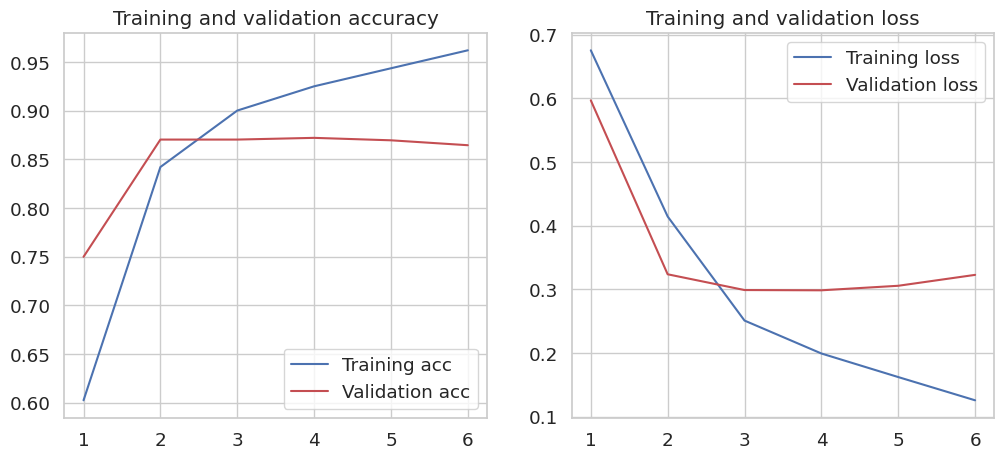

In [ ]:
plot_history(history)

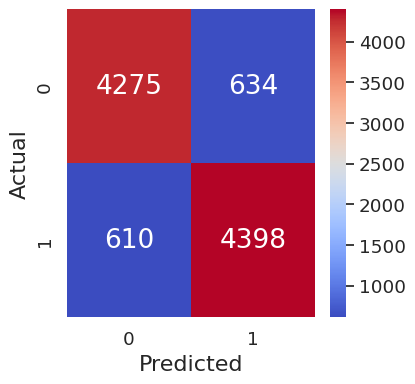

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot using seaborn
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', xticklabels=[0,1], yticklabels=[0,1], fmt='d', annot_kws={"fontsize":19})
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual", fontsize=16)
plt.show()

END
________________________________________________________________________________
